In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
l=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(l,axis=1,inplace=True)
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df['v1']=df['v1'].replace(['ham','spam'],[0,1])
print(df)

      v1                                                 v2
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
...   ..                                                ...
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will Ì_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df.rename(columns = {'v1':'category','v2':'result'}, inplace = True)
print(df)

      category                                             result
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  This is the 2nd time we have tried 2 contact u...
5568         0              Will Ì_ b going to esplanade fr home?
5569         0  Pity, * was in mood for that. So...any other s...
5570         0  The guy did some bitching but I acted like i'd...
5571         0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df.isna().sum()

category    0
result      0
dtype: int64

In [ ]:
df.describe()

,category
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
x=df['result']
y=df['category']
print(x,y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: result, Length: 5572, dtype: object 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 3)

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
son = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
xtrf = son.fit_transform(x_train)
xtf= son.transform(x_test)
print(xtrf)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [ ]:
print(xtf)

  (0, 6007)	0.537093591660729
  (0, 4294)	0.5159375448718375
  (0, 1537)	0.667337188824809
  (1, 7222)	0.23059492898537967
  (1, 6599)	0.14954692788663673
  (1, 6579)	0.2733682162643466
  (1, 5501)	0.28671640581392144
  (1, 5347)	0.2733682162643466
  (1, 5250)	0.28671640581392144
  (1, 4045)	0.250549335510249
  (1, 3365)	0.28671640581392144
  (1, 3300)	0.37297727661877506
  (1, 2899)	0.1385795841356552
  (1, 602)	0.28671640581392144
  (1, 520)	0.19344507865262492
  (1, 321)	0.28671640581392144
  (1, 43)	0.24547458936715758
  (1, 1)	0.21260233518669946
  (2, 6701)	0.30969080396105314
  (2, 6648)	0.3410121739015846
  (2, 4070)	0.44361668503137164
  (2, 2941)	0.6068486133983123
  (2, 2939)	0.47195476517479323
  (3, 7101)	0.29334330258175106
  (3, 6746)	0.2031810874151213
  :	:
  (1111, 7415)	0.4945753828645536
  (1111, 6848)	0.39685462025643714
  (1111, 6093)	0.4671914311419049
  (1111, 3259)	0.4477622081928626
  (1111, 2458)	0.42325261089251354
  (1112, 4903)	0.4770390302498559
  (1112, 

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [ ]:
lg.fit(xtrf,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=lg.predict(xtrf)
print(accuracy_score(y_train,y_pred)*100)

96.61207089970833


In [ ]:
y_test_pred=lg.predict(xtf)
print(accuracy_score(y_test,y_test_pred)*100)

96.23318385650225


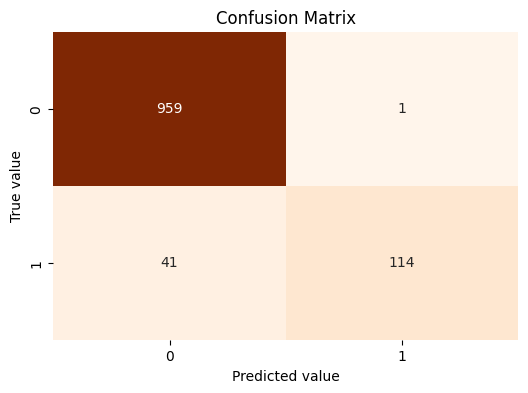

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Oranges', cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
input_mail = ["Congratulations! You have won a free vacation to an exotic destination. Click the link to claim your prize now!"]
idf = son.transform(input_mail)
prediction = lg.predict(idf)
print(prediction)
if (prediction)[0] == 1:
  print("Spam Mail")
else:
  print("Ham Mail")

[1]
Ham Mail
